In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
%matplotlib inline
plt.ioff()
import pandas as pd

In [188]:
df = pd.read_csv('US_births_2000-2014_SSA.csv')

In [189]:
df.head()

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


In [190]:
# Check there are the right number of days
assert len(df) - 365*15 - 4 == 0

# 1. Visualization

In [191]:
mean_births = df.births.sum() / len(df)

rel_freq = (
  df.groupby(['month', 'date_of_month'])
    .births
    .mean()
) / mean_births

In [192]:
# Day closest to rel_freq == 1
print(f'Most average day : {(rel_freq - 1).abs().idxmin()}')

# Maximum frequency
print(f'Most frequent day: {(rel_freq).idxmax()}')

Most average day : (12, 16)
Most frequent day: (9, 12)


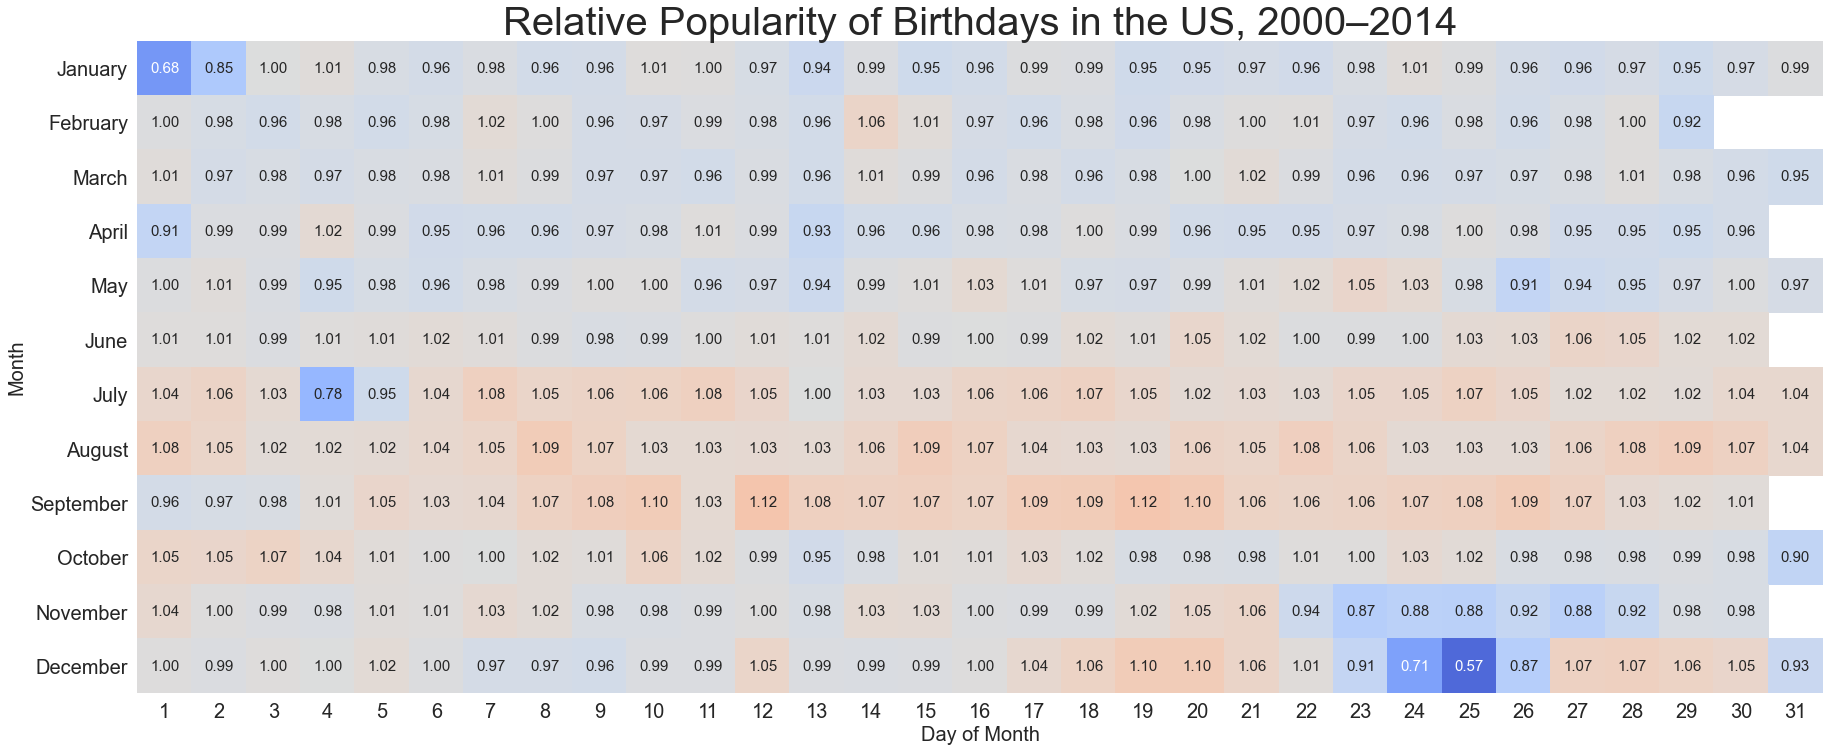

In [193]:
fig, ax = plt.subplots(figsize = (31, 12))
sns.heatmap(rel_freq.unstack(-1),
            ax = ax, 
            center = 1, 
            vmin = 0.5,
            vmax = 1.5,
            annot = True,
            fmt = '.2f',
            square = True,
            cmap = 'coolwarm',
            cbar = False,
            annot_kws = {'fontdict' : {'fontsize' : 15}}
           )

font_dict = {'fontsize' : 20}
ax.set_facecolor('white')
ax.set_xlabel('Day of Month', font_dict)
ax.set_ylabel('Month', font_dict)
ax.set_yticklabels([
  'January',
  'February',
  'March',
  'April',
  'May',
  'June',
  'July',
  'August',
  'September',
  'October',
  'November',
  'December'
], font_dict, rotation = 0)
ax.set_title('Relative Popularity of Birthdays in the US, 2000–2014', fontdict = {'fontsize' : 40})#{'fontsize' : 40})
plt.xticks(fontsize = 20)
plt.yticks(rotation = 0)
fig.savefig('outputs/chart.png', transparent = True)
plt.show()

# 2. Exact Computation in the Uniform Case

In [194]:
from functools import reduce

# For python >= 3.8, do: from math import product
def product(iterable):
  return reduce(lambda x, y : x * y, iterable, 1)

def lmap(predicate, iterable):
  return list(map(predicate, iterable))

In [195]:
def uniform_birthday_problem(n):
  return 1 - product([(365-k)/365 for k in range(n)])

In [196]:
n_range = list(range(100))
uniform_p = pd.DataFrame({
  'n'       : n_range,
  'p'       : lmap(uniform_birthday_problem, n_range),
  '0.5'  : [0.5 for _ in n_range],
})

In [197]:
plt.close('all')

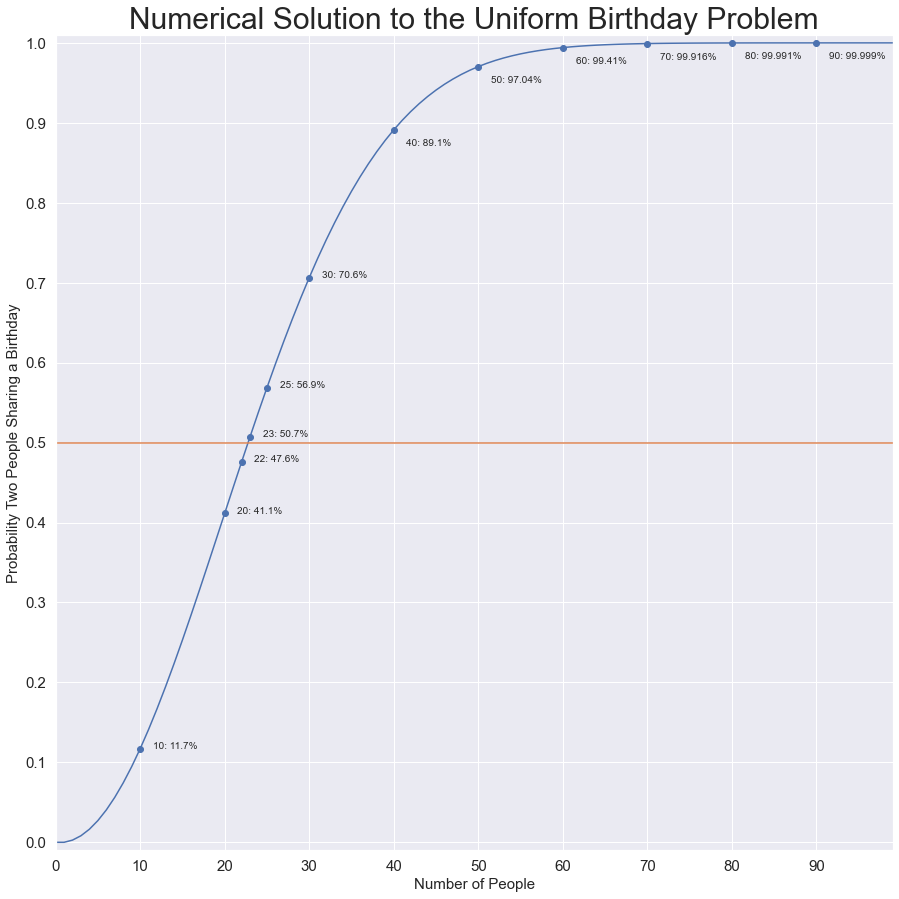

In [202]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.lineplot(
  data = uniform_p.melt(id_vars = 'n'),
  x    = 'n',
  y    = 'value',
  hue  = 'variable',
  ax   = ax
)

# Annotations. Offsets are hand-coded for the figure
for n in [10, 20, 22, 23, 25, 30, 40, 50, 60, 70, 80, 90]:
  p = uniform_p.p[n]
  ax.scatter(n, p, color = sns.color_palette()[0])
  if n >= 40:
    xy = (n + 1.5, p - 0.02)
  elif n == 22:
    xy = (n + 1.5, p)
  else:
    xy = (n + 1.5, p)
  
  if 1-p >= 0.1:
    text = f'{n}: {p:.1%}'
  elif 1-p >= 0.001:
    text = f'{n}: {p:.2%}'
  else:
    text = f'{n}: {p:.3%}'

  ax.annotate(text, xy)
  
font_dict = {'fontsize' : 15}
ax.get_legend().remove()
ax.set_title('Numerical Solution to the Uniform Birthday Problem', fontdict = {'fontsize' : 30})
ax.set_yticks([x/10 for x in range(11)])
ax.set_xticks([x * 10 for x in range(10)])
ax.set_ylim([-0.01,1.01])
ax.set_xlim([0, 99])
ax.set_xlabel('Number of People', font_dict)
ax.set_ylabel('Probability Two People Sharing a Birthday', font_dict)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

fig.savefig('outputs/uniform_numerical.png')
plt.show()